In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, jaccard_score

In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv("framingham.csv")

# Display counts of 0s and 1s in FutureCHD before balancing
before_counts = df['FutureCHD'].value_counts()
print("Counts before balancing:")
print(before_counts)



Counts before balancing:
FutureCHD
0    3596
1     644
Name: count, dtype: int64


Counts before balancing:
FutureCHD
0    3596
1     644
Name: count, dtype: int64


C:\Users\spbis\AppData\Local\Temp\ipykernel_2700\3338393328.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='FutureCHD', data=df, palette='Set1')


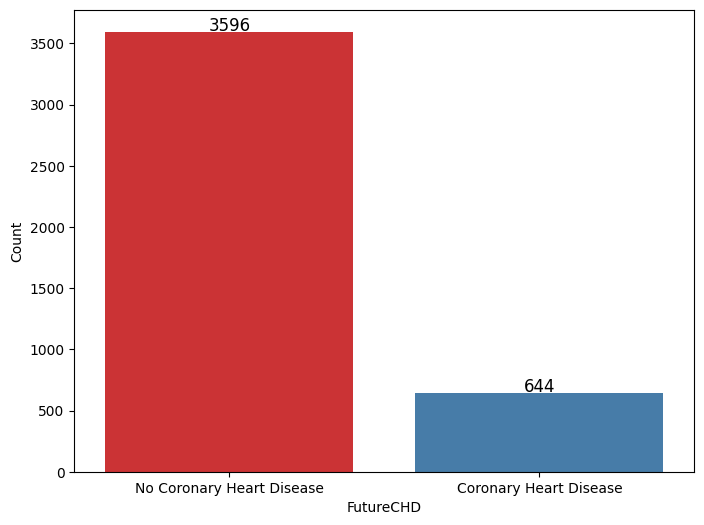

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame and 'FutureCHD' is the column of interest
before_counts = df['FutureCHD'].value_counts()

# Print counts before balancing
print("Counts before balancing:")
print(before_counts)

# Plotting the counts
plt.figure(figsize=(8, 6))
sns.countplot(x='FutureCHD', data=df, palette='Set1')

# Adding counts as text on the plot
for i, count in enumerate(before_counts):
    plt.text(i, count+10, str(count), ha='center', fontsize=12)


plt.xlabel('FutureCHD')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Coronary Heart Disease', 'Coronary Heart Disease'])

plt.show()


In [4]:
# Drop rows where FutureCHD=0 and any column has missing values
df.drop(df[(df['FutureCHD'] == 0) & df.isnull().any(axis=1)].index, inplace=True)

# Reset index after dropping rows
df.reset_index(drop=True, inplace=True)
df

,gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,FutureCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3740,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
3741,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
3742,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
3743,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


# Preprocessing

Counts before balancing:
FutureCHD
0    3101
1     644
Name: count, dtype: int64


C:\Users\spbis\AppData\Local\Temp\ipykernel_2700\3338393328.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='FutureCHD', data=df, palette='Set1')


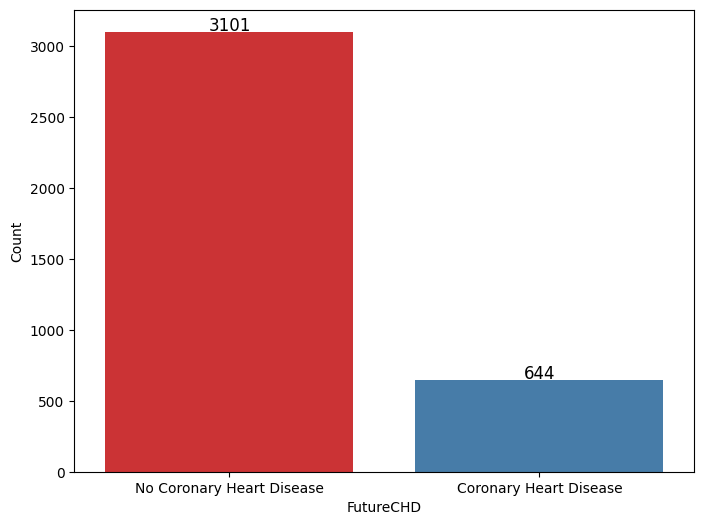

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame and 'FutureCHD' is the column of interest
before_counts = df['FutureCHD'].value_counts()

# Print counts before balancing
print("Counts before balancing:")
print(before_counts)

# Plotting the counts
plt.figure(figsize=(8, 6))
sns.countplot(x='FutureCHD', data=df, palette='Set1')

# Adding counts as text on the plot
for i, count in enumerate(before_counts):
    plt.text(i, count+10, str(count), ha='center', fontsize=12)


plt.xlabel('FutureCHD')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Coronary Heart Disease', 'Coronary Heart Disease'])

plt.show()


In [6]:
# Check for missing values
missing_values = df.isnull().sum()

print("Missing values per column:")
print(missing_values)

Missing values per column:
gender              0
age                 0
education          16
currentSmoker       0
cigsPerDay          2
BPMeds             11
prevalentStroke     0
prevalentHyp        0
diabetes            0
totChol             9
sysBP               0
diaBP               0
BMI                10
heartRate           1
glucose            50
FutureCHD           0
dtype: int64


In [7]:
# Impute remaining missing values with mean
df.fillna(df.mean(), inplace=True)

# Reset index after dropping rows and imputing missing values
df.reset_index(drop=True, inplace=True)

In [8]:
# Check for missing values
missing_values = df.isnull().sum()

print("Missing values per column:")
print(missing_values)

Missing values per column:
gender             0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
FutureCHD          0
dtype: int64


# With Correaltion Without data balancing

In [9]:
df2=df

df2.drop(columns=['cigsPerDay','diaBP', 'education'], inplace=True)

In [10]:
# separate input and output
X=df2.drop(columns=['FutureCHD'])
Y=df2['FutureCHD']

# split the data for training and testing
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2, random_state=42)

In [11]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression


# Initialize and train the Logistic Regression model
logistic_regression = LogisticRegression(random_state=42)
logistic_regression.fit(X_train, Y_train)

# Predictions
Y_pred_lr = logistic_regression.predict(X_test)

# Calculate evaluation metrics for Logistic Regression
accuracy_lr = accuracy_score(Y_test, Y_pred_lr)
precision_lr = precision_score(Y_test, Y_pred_lr)
recall_lr = recall_score(Y_test, Y_pred_lr)
f1_lr = f1_score(Y_test, Y_pred_lr)
jaccard_lr = jaccard_score(Y_test, Y_pred_lr)

table = [["Metric", "Value"],
         ["Accuracy", accuracy_lr],
         ["Precision", precision_lr],
         ["Recall", recall_lr],
         ["F1 Score", f1_lr],
         ["Jaccard Index", jaccard_lr]]

# Print the table
print(tabulate(table, headers="firstrow", tablefmt="fancy_grid"))

╒═══════════════╤═══════════╕
│ Metric        │     Value │
╞═══════════════╪═══════════╡
│ Accuracy      │ 0.805073  │
├───────────────┼───────────┤
│ Precision     │ 0.4       │
├───────────────┼───────────┤
│ Recall        │ 0.0277778 │
├───────────────┼───────────┤
│ F1 Score      │ 0.0519481 │
├───────────────┼───────────┤
│ Jaccard Index │ 0.0266667 │
╘═══════════════╧═══════════╛


c:\Users\spbis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [12]:
# KNN

from sklearn.neighbors import KNeighborsClassifier

# Initialize and train the KNN model
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)

# Predictions
Y_pred_knn = knn.predict(X_test)

# Calculate evaluation metrics for KNN
accuracy_knn = accuracy_score(Y_test, Y_pred_knn)
precision_knn = precision_score(Y_test, Y_pred_knn)
recall_knn = recall_score(Y_test, Y_pred_knn)
f1_knn = f1_score(Y_test, Y_pred_knn)
jaccard_knn = jaccard_score(Y_test, Y_pred_knn)

# Create a table for the evaluation metrics
table_knn = [["Metric", "Value"],
             ["Accuracy", accuracy_knn],
             ["Precision", precision_knn],
             ["Recall", recall_knn],
             ["F1 Score", f1_knn],
             ["Jaccard Index", jaccard_knn]]

# Print the table for KNN
print(tabulate(table_knn, headers="firstrow", tablefmt="fancy_grid"))


╒═══════════════╤══════════╕
│ Metric        │    Value │
╞═══════════════╪══════════╡
│ Accuracy      │ 0.793057 │
├───────────────┼──────────┤
│ Precision     │ 0.392157 │
├───────────────┼──────────┤
│ Recall        │ 0.138889 │
├───────────────┼──────────┤
│ F1 Score      │ 0.205128 │
├───────────────┼──────────┤
│ Jaccard Index │ 0.114286 │
╘═══════════════╧══════════╛


In [13]:
 # SVM

 from sklearn.svm import SVC

# Initialize and train the SVM model
svm_model = SVC(random_state=42)
svm_model.fit(X_train, Y_train)

# Predictions
Y_pred_svm = svm_model.predict(X_test)

# Calculate evaluation metrics for SVM
accuracy_svm = accuracy_score(Y_test, Y_pred_svm)
precision_svm = precision_score(Y_test, Y_pred_svm)
recall_svm = recall_score(Y_test, Y_pred_svm)
f1_svm = f1_score(Y_test, Y_pred_svm)
jaccard_svm = jaccard_score(Y_test, Y_pred_svm)

# Create a table for the evaluation metrics
table_svm = [["Metric", "Value"],
             ["Accuracy", accuracy_svm],
             ["Precision", precision_svm],
             ["Recall", recall_svm],
             ["F1 Score", f1_svm],
             ["Jaccard Index", jaccard_svm]]

# Print the table for SVM
print(tabulate(table_svm, headers="firstrow", tablefmt="fancy_grid"))


╒═══════════════╤══════════╕
│ Metric        │    Value │
╞═══════════════╪══════════╡
│ Accuracy      │ 0.807744 │
├───────────────┼──────────┤
│ Precision     │ 0        │
├───────────────┼──────────┤
│ Recall        │ 0        │
├───────────────┼──────────┤
│ F1 Score      │ 0        │
├───────────────┼──────────┤
│ Jaccard Index │ 0        │
╘═══════════════╧══════════╛


c:\Users\spbis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [14]:
# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier


# Initialize and train the Random Forest model
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, Y_train)

# Predictions
Y_pred_rf = random_forest.predict(X_test)

# Calculate evaluation metrics for Random Forest
accuracy_rf = accuracy_score(Y_test, Y_pred_rf)
precision_rf = precision_score(Y_test, Y_pred_rf)
recall_rf = recall_score(Y_test, Y_pred_rf)
f1_rf = f1_score(Y_test, Y_pred_rf)
jaccard_rf = jaccard_score(Y_test, Y_pred_rf)

# Create a table for the evaluation metrics
table_rf = [["Metric", "Value"],
             ["Accuracy", accuracy_rf],
             ["Precision", precision_rf],
             ["Recall", recall_rf],
             ["F1 Score", f1_rf],
             ["Jaccard Index", jaccard_rf]]

# Print the table for Random Forest
print(tabulate(table_rf, headers="firstrow", tablefmt="fancy_grid"))


╒═══════════════╤═══════════╕
│ Metric        │     Value │
╞═══════════════╪═══════════╡
│ Accuracy      │ 0.801068  │
├───────────────┼───────────┤
│ Precision     │ 0.368421  │
├───────────────┼───────────┤
│ Recall        │ 0.0486111 │
├───────────────┼───────────┤
│ F1 Score      │ 0.0858896 │
├───────────────┼───────────┤
│ Jaccard Index │ 0.0448718 │
╘═══════════════╧═══════════╛


In [15]:
# Calculate evaluation metrics for Logistic Regression
metrics_lr = ["Logistic Regression",
              accuracy_lr,
              precision_lr,
              recall_lr,
              f1_lr,
              jaccard_lr]

# Calculate evaluation metrics for KNN
metrics_knn = ["KNN",
               accuracy_knn,
               precision_knn,
               recall_knn,
               f1_knn,
               jaccard_knn]

# Calculate evaluation metrics for Random Forest
metrics_rf = ["Random Forest",
              accuracy_rf,
              precision_rf,
              recall_rf,
              f1_rf,
              jaccard_rf]

# Calculate evaluation metrics for SVM
metrics_svm = ["SVM",
               accuracy_svm,
               precision_svm,
               recall_svm,
               f1_svm,
               jaccard_svm]



# Combine all metrics into a single table
combined_table = [metrics_lr, metrics_knn, metrics_rf, metrics_svm]

# Print the combined table
print(tabulate(combined_table, headers=["Model", "Accuracy", "Precision", "Recall", "F1 Score", "Jaccard Index"], tablefmt="fancy_grid"))

╒═════════════════════╤════════════╤═════════════╤═══════════╤════════════╤═════════════════╕
│ Model               │   Accuracy │   Precision │    Recall │   F1 Score │   Jaccard Index │
╞═════════════════════╪════════════╪═════════════╪═══════════╪════════════╪═════════════════╡
│ Logistic Regression │   0.805073 │    0.4      │ 0.0277778 │  0.0519481 │       0.0266667 │
├─────────────────────┼────────────┼─────────────┼───────────┼────────────┼─────────────────┤
│ KNN                 │   0.793057 │    0.392157 │ 0.138889  │  0.205128  │       0.114286  │
├─────────────────────┼────────────┼─────────────┼───────────┼────────────┼─────────────────┤
│ Random Forest       │   0.801068 │    0.368421 │ 0.0486111 │  0.0858896 │       0.0448718 │
├─────────────────────┼────────────┼─────────────┼───────────┼────────────┼─────────────────┤
│ SVM                 │   0.807744 │    0        │ 0         │  0         │       0         │
╘═════════════════════╧════════════╧═════════════╧══════════

# With C and with D

WITH C AND WITH D

Counts before balancing:
FutureCHD
0    3101
1     644
Name: count, dtype: int64


C:\Users\spbis\AppData\Local\Temp\ipykernel_2700\1910077762.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='FutureCHD', data=df, palette='Set1')


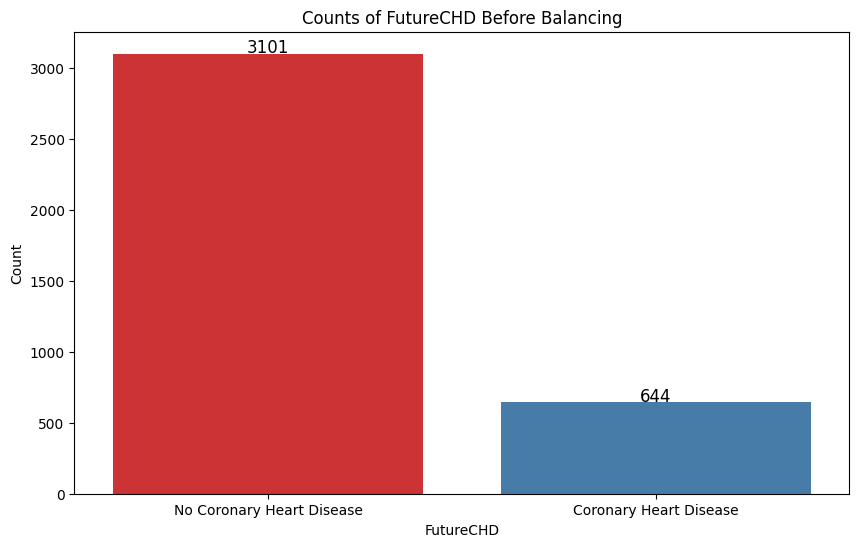


Counts after balancing:
FutureCHD
0    3101
1    3101
Name: count, dtype: int64


C:\Users\spbis\AppData\Local\Temp\ipykernel_2700\1910077762.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='FutureCHD', data=df_balanced, palette='Set1')


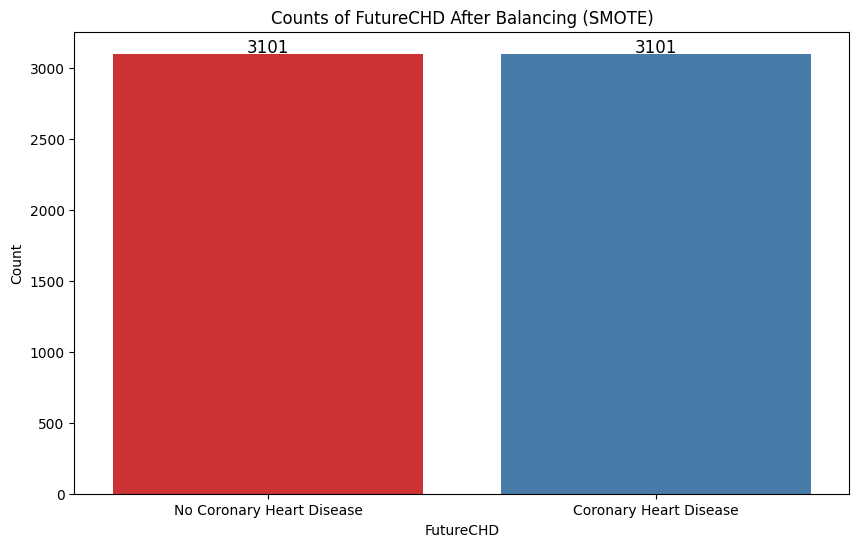

In [16]:
import pandas as pd
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns

# Display counts of 0s and 1s in FutureCHD before balancing
before_counts = df['FutureCHD'].value_counts()
print("Counts before balancing:")
print(before_counts)

# Plotting counts before balancing
plt.figure(figsize=(10, 6))
sns.countplot(x='FutureCHD', data=df, palette='Set1')
plt.title('Counts of FutureCHD Before Balancing')
plt.xlabel('FutureCHD')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Coronary Heart Disease', 'Coronary Heart Disease'])

# Adding counts as text on the plot for before balancing
for i, count in enumerate(before_counts):
    plt.text(i, count+10, str(count), ha='center', fontsize=12)

plt.show()

# Separate features and target variable
X = df2.drop('FutureCHD', axis=1)
y = df2['FutureCHD']

# Apply SMOTE to balance the data
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

# Convert numpy arrays back to DataFrame
df_balanced = pd.DataFrame(X_smote, columns=X.columns)
df_balanced['FutureCHD'] = y_smote

# Display counts of 0s and 1s in FutureCHD after balancing
after_counts = df_balanced['FutureCHD'].value_counts()
print("\nCounts after balancing:")
print(after_counts)

# Plotting counts after balancing
plt.figure(figsize=(10, 6))
sns.countplot(x='FutureCHD', data=df_balanced, palette='Set1')
plt.title('Counts of FutureCHD After Balancing (SMOTE)')
plt.xlabel('FutureCHD')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Coronary Heart Disease', 'Coronary Heart Disease'])

# Adding counts as text on the plot for after balancing
for i, count in enumerate(after_counts):
    plt.text(i, count+10, str(count), ha='center', fontsize=12)

plt.show()


In [17]:
df2=df_balanced

In [18]:
# separate input and output
X=df2.drop(columns=['FutureCHD'])
Y=df2['FutureCHD']

# split the data for training and testing
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2, random_state=42)

In [19]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression


# Initialize and train the Logistic Regression model
logistic_regression = LogisticRegression(random_state=42)
logistic_regression.fit(X_train, Y_train)

# Predictions
Y_pred_lr = logistic_regression.predict(X_test)

# Calculate evaluation metrics for Logistic Regression
accuracy_lr = accuracy_score(Y_test, Y_pred_lr)
precision_lr = precision_score(Y_test, Y_pred_lr)
recall_lr = recall_score(Y_test, Y_pred_lr)
f1_lr = f1_score(Y_test, Y_pred_lr)
jaccard_lr = jaccard_score(Y_test, Y_pred_lr)

table = [["Metric", "Value"],
         ["Accuracy", accuracy_lr],
         ["Precision", precision_lr],
         ["Recall", recall_lr],
         ["F1 Score", f1_lr],
         ["Jaccard Index", jaccard_lr]]

# Print the table
print(tabulate(table, headers="firstrow", tablefmt="fancy_grid"))

╒═══════════════╤══════════╕
│ Metric        │    Value │
╞═══════════════╪══════════╡
│ Accuracy      │ 0.676873 │
├───────────────┼──────────┤
│ Precision     │ 0.665079 │
├───────────────┼──────────┤
│ Recall        │ 0.688013 │
├───────────────┼──────────┤
│ F1 Score      │ 0.676352 │
├───────────────┼──────────┤
│ Jaccard Index │ 0.510976 │
╘═══════════════╧══════════╛


c:\Users\spbis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
# KNN

from sklearn.neighbors import KNeighborsClassifier

# Initialize and train the KNN model
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)

# Predictions
Y_pred_knn = knn.predict(X_test)

# Calculate evaluation metrics for KNN
accuracy_knn = accuracy_score(Y_test, Y_pred_knn)
precision_knn = precision_score(Y_test, Y_pred_knn)
recall_knn = recall_score(Y_test, Y_pred_knn)
f1_knn = f1_score(Y_test, Y_pred_knn)
jaccard_knn = jaccard_score(Y_test, Y_pred_knn)

# Create a table for the evaluation metrics
table_knn = [["Metric", "Value"],
             ["Accuracy", accuracy_knn],
             ["Precision", precision_knn],
             ["Recall", recall_knn],
             ["F1 Score", f1_knn],
             ["Jaccard Index", jaccard_knn]]

# Print the table for KNN
print(tabulate(table_knn, headers="firstrow", tablefmt="fancy_grid"))


╒═══════════════╤══════════╕
│ Metric        │    Value │
╞═══════════════╪══════════╡
│ Accuracy      │ 0.775181 │
├───────────────┼──────────┤
│ Precision     │ 0.698317 │
├───────────────┼──────────┤
│ Recall        │ 0.954023 │
├───────────────┼──────────┤
│ F1 Score      │ 0.806384 │
├───────────────┼──────────┤
│ Jaccard Index │ 0.675581 │
╘═══════════════╧══════════╛


In [21]:
 # SVM

 from sklearn.svm import SVC

# Initialize and train the SVM model
svm_model = SVC(random_state=42)
svm_model.fit(X_train, Y_train)

# Predictions
Y_pred_svm = svm_model.predict(X_test)

# Calculate evaluation metrics for SVM
accuracy_svm = accuracy_score(Y_test, Y_pred_svm)
precision_svm = precision_score(Y_test, Y_pred_svm)
recall_svm = recall_score(Y_test, Y_pred_svm)
f1_svm = f1_score(Y_test, Y_pred_svm)
jaccard_svm = jaccard_score(Y_test, Y_pred_svm)

# Create a table for the evaluation metrics
table_svm = [["Metric", "Value"],
             ["Accuracy", accuracy_svm],
             ["Precision", precision_svm],
             ["Recall", recall_svm],
             ["F1 Score", f1_svm],
             ["Jaccard Index", jaccard_svm]]

# Print the table for SVM
print(tabulate(table_svm, headers="firstrow", tablefmt="fancy_grid"))


╒═══════════════╤══════════╕
│ Metric        │    Value │
╞═══════════════╪══════════╡
│ Accuracy      │ 0.637389 │
├───────────────┼──────────┤
│ Precision     │ 0.61919  │
├───────────────┼──────────┤
│ Recall        │ 0.678161 │
├───────────────┼──────────┤
│ F1 Score      │ 0.647335 │
├───────────────┼──────────┤
│ Jaccard Index │ 0.478563 │
╘═══════════════╧══════════╛


In [22]:
# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier


# Initialize and train the Random Forest model
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, Y_train)

# Predictions
Y_pred_rf = random_forest.predict(X_test)

# Calculate evaluation metrics for Random Forest
accuracy_rf = accuracy_score(Y_test, Y_pred_rf)
precision_rf = precision_score(Y_test, Y_pred_rf)
recall_rf = recall_score(Y_test, Y_pred_rf)
f1_rf = f1_score(Y_test, Y_pred_rf)
jaccard_rf = jaccard_score(Y_test, Y_pred_rf)

# Create a table for the evaluation metrics
table_rf = [["Metric", "Value"],
             ["Accuracy", accuracy_rf],
             ["Precision", precision_rf],
             ["Recall", recall_rf],
             ["F1 Score", f1_rf],
             ["Jaccard Index", jaccard_rf]]

# Print the table for Random Forest
print(tabulate(table_rf, headers="firstrow", tablefmt="fancy_grid"))


╒═══════════════╤══════════╕
│ Metric        │    Value │
╞═══════════════╪══════════╡
│ Accuracy      │ 0.849315 │
├───────────────┼──────────┤
│ Precision     │ 0.832808 │
├───────────────┼──────────┤
│ Recall        │ 0.866995 │
├───────────────┼──────────┤
│ F1 Score      │ 0.849558 │
├───────────────┼──────────┤
│ Jaccard Index │ 0.738462 │
╘═══════════════╧══════════╛


In [23]:
#Hypertuning the RF
from sklearn.model_selection import GridSearchCV


# Assuming X_train, X_test, Y_train, Y_test are already defined

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the Random Forest classifier
random_forest = RandomForestClassifier(random_state=42)

# Perform GridSearchCV to find the best parameters
grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search.fit(X_train, Y_train)

# Get the best estimator (best model)
best_rf_clf = grid_search.best_estimator_

# Make predictions using the best model
Y_pred_rf = best_rf_clf.predict(X_test)

# Calculate evaluation metrics for the best model
accuracy_rf_1 = accuracy_score(Y_test, Y_pred_rf)
precision_rf_1 = precision_score(Y_test, Y_pred_rf)
recall_rf_1 = recall_score(Y_test, Y_pred_rf)
f1_rf_1 = f1_score(Y_test, Y_pred_rf)
jaccard_rf_1 = jaccard_score(Y_test, Y_pred_rf)

# Create a table for the evaluation metrics
table_rf = [["Metric", "Value"],
            ["Accuracy", accuracy_rf_1],
            ["Precision", precision_rf_1],
            ["Recall", recall_rf_1],
            ["F1 Score", f1_rf_1],
            ["Jaccard Index", jaccard_rf_1]]

# Print the table for Random Forest
print(tabulate(table_rf, headers="firstrow", tablefmt="fancy_grid"))

# Print the best parameters found by GridSearchCV
print("\nBest Parameters found by GridSearchCV:")
print(grid_search.best_params_)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
╒═══════════════╤══════════╕
│ Metric        │    Value │
╞═══════════════╪══════════╡
│ Accuracy      │ 0.86946  │
├───────────────┼──────────┤
│ Precision     │ 0.8646   │
├───────────────┼──────────┤
│ Recall        │ 0.870279 │
├───────────────┼──────────┤
│ F1 Score      │ 0.86743  │
├───────────────┼──────────┤
│ Jaccard Index │ 0.765896 │
╘═══════════════╧══════════╛

Best Parameters found by GridSearchCV:
{'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [24]:
# Calculate evaluation metrics for Logistic Regression
metrics_lr = ["Logistic Regression",
              accuracy_lr,
              precision_lr,
              recall_lr,
              f1_lr,
              jaccard_lr]

# Calculate evaluation metrics for KNN
metrics_knn = ["KNN",
               accuracy_knn,
               precision_knn,
               recall_knn,
               f1_knn,
               jaccard_knn]

# Calculate evaluation metrics for Random Forest
metrics_rf = ["Random Forest",
              accuracy_rf,
              precision_rf,
              recall_rf,
              f1_rf,
              jaccard_rf]

# Calculate evaluation metrics for SVM
metrics_svm = ["SVM",
               accuracy_svm,
               precision_svm,
               recall_svm,
               f1_svm,
               jaccard_svm]



# Combine all metrics into a single table
combined_table = [metrics_lr, metrics_knn, metrics_rf, metrics_svm]

# Print the combined table
print(tabulate(combined_table, headers=["Model", "Accuracy", "Precision", "Recall", "F1 Score", "Jaccard Index"], tablefmt="fancy_grid"))

╒═════════════════════╤════════════╤═════════════╤══════════╤════════════╤═════════════════╕
│ Model               │   Accuracy │   Precision │   Recall │   F1 Score │   Jaccard Index │
╞═════════════════════╪════════════╪═════════════╪══════════╪════════════╪═════════════════╡
│ Logistic Regression │   0.676873 │    0.665079 │ 0.688013 │   0.676352 │        0.510976 │
├─────────────────────┼────────────┼─────────────┼──────────┼────────────┼─────────────────┤
│ KNN                 │   0.775181 │    0.698317 │ 0.954023 │   0.806384 │        0.675581 │
├─────────────────────┼────────────┼─────────────┼──────────┼────────────┼─────────────────┤
│ Random Forest       │   0.849315 │    0.832808 │ 0.866995 │   0.849558 │        0.738462 │
├─────────────────────┼────────────┼─────────────┼──────────┼────────────┼─────────────────┤
│ SVM                 │   0.637389 │    0.61919  │ 0.678161 │   0.647335 │        0.478563 │
╘═════════════════════╧════════════╧═════════════╧══════════╧═════════

In [25]:
df2

,gender,age,currentSmoker,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,BMI,heartRate,glucose,FutureCHD
0,1,39,0,0.000000,0,0,0,195.000000,106.000000,26.970000,80.000000,77.000000,0
1,0,46,0,0.000000,0,0,0,250.000000,121.000000,28.730000,95.000000,76.000000,0
2,1,48,1,0.000000,0,0,0,245.000000,127.500000,25.340000,75.000000,70.000000,0
3,0,61,1,0.000000,0,1,0,225.000000,150.000000,28.580000,65.000000,103.000000,1
4,0,46,1,0.000000,0,0,0,285.000000,130.000000,23.100000,85.000000,85.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6197,1,58,0,0.000000,0,0,0,200.377766,115.188883,22.001757,87.401719,79.960687,1
6198,0,49,1,0.000000,0,0,0,261.772172,115.911311,22.887339,64.772172,57.911311,1
6199,0,51,0,0.003213,0,0,0,295.374140,130.564651,25.395820,56.208620,110.068092,1
6200,1,59,0,0.000000,0,1,0,250.675585,132.621702,25.786124,77.108138,117.702713,1


# ReliefF

Apply reliefF

In [26]:
pip install skrebate

Note: you may need to restart the kernel to use updated packages.


In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, jaccard_score
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from skrebate import ReliefF
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

In [28]:
# Separate features (X) and target (y)
X = df2.drop(columns=['FutureCHD'])
y = df2['FutureCHD']


# Apply ReliefF feature selection
reliefF = ReliefF(n_neighbors=150)
reliefF.fit(X.values, y.values)

# Get ReliefF scores and feature names
reliefF_scores = reliefF.feature_importances_
feature_names = X.columns

In [30]:
from tabulate import tabulate

# Create a list of tuples containing feature names and their ReliefF scores
rankings_table = [(feature, score) for feature, score in zip(X.columns, reliefF_scores)]

# Sort the list based on ReliefF scores (descending order)
rankings_table.sort(key=lambda x: x[1], reverse=True)

# Assign ranks based on the sorted order
ranked_table_with_ranks = [(i+1, feature, score) for i, (feature, score) in enumerate(rankings_table)]

# Print the table using tabulate
print(tabulate(ranked_table_with_ranks, headers=["Rank", "Feature", "ReliefF Score"], tablefmt="pretty"))

sorted_feature_names = [feature for rank, feature, score in ranked_table_with_ranks]

print(sorted_feature_names)


+------+-----------------+-------------------------+
| Rank |     Feature     |      ReliefF Score      |
+------+-----------------+-------------------------+
|  1   |       age       |   0.04532742691944309   |
|  2   |      sysBP      |  0.037502892922481774   |
|  3   |     totChol     |  0.020157887894559433   |
|  4   |       BMI       |  0.019475398009858664   |
|  5   |    heartRate    |  0.019174572632414774   |
|  6   |     glucose     |  0.005888953704980504   |
|  7   |     BPMeds      |  0.004642665243021699   |
|  8   |    diabetes     |  0.003019456089433516   |
|  9   | prevalentStroke | -5.052133720305285e-05  |
|  10  |  currentSmoker  | -0.00018381167365366045 |
|  11  |     gender      | -0.00040847038589702226 |
|  12  |  prevalentHyp   |  -0.00054713533268838   |
+------+-----------------+-------------------------+
['age', 'sysBP', 'totChol', 'BMI', 'heartRate', 'glucose', 'BPMeds', 'diabetes', 'prevalentStroke', 'currentSmoker', 'gender', 'prevalentHyp']


In [31]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression


# Sort features based on ReliefF scores
sorted_features = [feature for _, feature in sorted(zip(reliefF_scores, feature_names), reverse=True)]

# Define feature sizes
feature_sizes = np.arange(0.2, 1.1, 0.2)

# Initialize lists to store evaluation metrics and selected features
metrics = {'Feature Size': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': [], 'Jaccard Index': []}

for size in feature_sizes:
    # Select top features based on size
    num_features = int(size * len(sorted_features))
    selected_features = sorted_features[:num_features]

    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.2, random_state=42)

    # Train a classifier (example: RandomForestClassifier)
    classifier = LogisticRegression(random_state=42)
    classifier.fit(X_train, y_train)

    # Make predictions
    y_pred = classifier.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    jaccard = jaccard_score(y_test, y_pred)

    # Store metrics and selected features
    metrics['Feature Size'].append(size)
    metrics['Accuracy'].append(accuracy)
    metrics['Precision'].append(precision)
    metrics['Recall'].append(recall)
    metrics['F1 Score'].append(f1)
    metrics['Jaccard Index'].append(jaccard)



# Create a DataFrame from metrics
metrics_df = pd.DataFrame(metrics)

# Display the DataFrame using tabulate
print(tabulate(metrics_df, headers='keys', tablefmt='fancy_grid'))


╒════╤════════════════╤════════════╤═════════════╤══════════╤════════════╤═════════════════╕
│    │   Feature Size │   Accuracy │   Precision │   Recall │   F1 Score │   Jaccard Index │
╞════╪════════════════╪════════════╪═════════════╪══════════╪════════════╪═════════════════╡
│  0 │            0.2 │   0.64303  │    0.626524 │ 0.674877 │   0.649802 │        0.481265 │
├────┼────────────────┼────────────┼─────────────┼──────────┼────────────┼─────────────────┤
│  1 │            0.4 │   0.644641 │    0.628049 │ 0.676519 │   0.651383 │        0.483001 │
├────┼────────────────┼────────────┼─────────────┼──────────┼────────────┼─────────────────┤
│  2 │            0.6 │   0.649476 │    0.631818 │ 0.684729 │   0.65721  │        0.489437 │
├────┼────────────────┼────────────┼─────────────┼──────────┼────────────┼─────────────────┤
│  3 │            0.8 │   0.653505 │    0.636225 │ 0.686371 │   0.660348 │        0.492925 │
├────┼────────────────┼────────────┼─────────────┼──────────┼─────────

c:\Users\spbis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\spbis\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

In [32]:
#KNN

from sklearn.neighbors import KNeighborsClassifier



# Sort features based on ReliefF scores
sorted_features = [feature for _, feature in sorted(zip(reliefF_scores, feature_names), reverse=True)]

# Define feature sizes
feature_sizes = np.arange(0.2, 1.1, 0.2)

# Initialize lists to store evaluation metrics and selected features
metrics = {'Feature Size': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': [], 'Jaccard Index': []}

for size in feature_sizes:
    # Select top features based on size
    num_features = int(size * len(sorted_features))
    selected_features = sorted_features[:num_features]

    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.2, random_state=42)

    # Train a classifier (example: RandomForestClassifier)
    classifier = KNeighborsClassifier()
    classifier.fit(X_train, y_train)

    # Make predictions
    y_pred = classifier.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    jaccard = jaccard_score(y_test, y_pred)

    # Store metrics and selected features
    metrics['Feature Size'].append(size)
    metrics['Accuracy'].append(accuracy)
    metrics['Precision'].append(precision)
    metrics['Recall'].append(recall)
    metrics['F1 Score'].append(f1)
    metrics['Jaccard Index'].append(jaccard)


# Create a DataFrame from metrics
metrics_df = pd.DataFrame(metrics)

# Display the DataFrame using tabulate
print(tabulate(metrics_df, headers='keys', tablefmt='fancy_grid'))

╒════╤════════════════╤════════════╤═════════════╤══════════╤════════════╤═════════════════╕
│    │   Feature Size │   Accuracy │   Precision │   Recall │   F1 Score │   Jaccard Index │
╞════╪════════════════╪════════════╪═════════════╪══════════╪════════════╪═════════════════╡
│  0 │            0.2 │   0.659952 │    0.646782 │ 0.676519 │   0.661316 │        0.494005 │
├────┼────────────────┼────────────┼─────────────┼──────────┼────────────┼─────────────────┤
│  1 │            0.4 │   0.736503 │    0.681234 │ 0.870279 │   0.764239 │        0.618436 │
├────┼────────────────┼────────────┼─────────────┼──────────┼────────────┼─────────────────┤
│  2 │            0.6 │   0.774376 │    0.697479 │ 0.954023 │   0.805825 │        0.674797 │
├────┼────────────────┼────────────┼─────────────┼──────────┼────────────┼─────────────────┤
│  3 │            0.8 │   0.774376 │    0.697479 │ 0.954023 │   0.805825 │        0.674797 │
├────┼────────────────┼────────────┼─────────────┼──────────┼─────────

In [33]:
# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier



# Sort features based on ReliefF scores
sorted_features = [feature for _, feature in sorted(zip(reliefF_scores, feature_names), reverse=True)]

# Define feature sizes
feature_sizes = np.arange(0.2, 1.1, 0.2)

# Initialize lists to store evaluation metrics and selected features
metrics = {'Feature Size': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': [], 'Jaccard Index': []}

for size in feature_sizes:
    # Select top features based on size
    num_features = int(size * len(sorted_features))
    selected_features = sorted_features[:num_features]

    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.2, random_state=42)

    # Train a classifier (example: RandomForestClassifier)
    classifier = RandomForestClassifier(random_state=42)
    classifier.fit(X_train, y_train)

    # Make predictions
    y_pred = classifier.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    jaccard = jaccard_score(y_test, y_pred)

    # Store metrics and selected features
    metrics['Feature Size'].append(size)
    metrics['Accuracy'].append(accuracy)
    metrics['Precision'].append(precision)
    metrics['Recall'].append(recall)
    metrics['F1 Score'].append(f1)
    metrics['Jaccard Index'].append(jaccard)


# Create a DataFrame from metrics
metrics_df = pd.DataFrame(metrics)

# Display the DataFrame using tabulate
print(tabulate(metrics_df, headers='keys', tablefmt='fancy_grid'))


╒════╤════════════════╤════════════╤═════════════╤══════════╤════════════╤═════════════════╕
│    │   Feature Size │   Accuracy │   Precision │   Recall │   F1 Score │   Jaccard Index │
╞════╪════════════════╪════════════╪═════════════╪══════════╪════════════╪═════════════════╡
│  0 │            0.2 │   0.680902 │    0.682676 │ 0.65353  │   0.667785 │        0.501259 │
├────┼────────────────┼────────────┼─────────────┼──────────┼────────────┼─────────────────┤
│  1 │            0.4 │   0.790492 │    0.762406 │ 0.832512 │   0.795918 │        0.661017 │
├────┼────────────────┼────────────┼─────────────┼──────────┼────────────┼─────────────────┤
│  2 │            0.6 │   0.858179 │    0.844197 │ 0.871921 │   0.857835 │        0.751061 │
├────┼────────────────┼────────────┼─────────────┼──────────┼────────────┼─────────────────┤
│  3 │            0.8 │   0.863014 │    0.847861 │ 0.878489 │   0.862903 │        0.758865 │
├────┼────────────────┼────────────┼─────────────┼──────────┼─────────

In [34]:
#SVM

from sklearn.svm import SVC


# Sort features based on ReliefF scores
sorted_features = [feature for _, feature in sorted(zip(reliefF_scores, feature_names), reverse=True)]

# Define feature sizes
feature_sizes = np.arange(0.2, 1.1, 0.2)

# Initialize lists to store evaluation metrics and selected features
metrics = {'Feature Size': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': [], 'Jaccard Index': []}

for size in feature_sizes:
    # Select top features based on size
    num_features = int(size * len(sorted_features))
    selected_features = sorted_features[:num_features]

    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.2, random_state=42)

    # Train a classifier (example: RandomForestClassifier)
    classifier = SVC(random_state=42)
    classifier.fit(X_train, y_train)

    # Make predictions
    y_pred = classifier.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    jaccard = jaccard_score(y_test, y_pred)

    # Store metrics and selected features
    metrics['Feature Size'].append(size)
    metrics['Accuracy'].append(accuracy)
    metrics['Precision'].append(precision)
    metrics['Recall'].append(recall)
    metrics['F1 Score'].append(f1)
    metrics['Jaccard Index'].append(jaccard)


# Create a DataFrame from metrics
metrics_df = pd.DataFrame(metrics)

# Display the DataFrame using tabulate
print(tabulate(metrics_df, headers='keys', tablefmt='fancy_grid'))


╒════╤════════════════╤════════════╤═════════════╤══════════╤════════════╤═════════════════╕
│    │   Feature Size │   Accuracy │   Precision │   Recall │   F1 Score │   Jaccard Index │
╞════╪════════════════╪════════════╪═════════════╪══════════╪════════════╪═════════════════╡
│  0 │            0.2 │   0.64303  │    0.614958 │ 0.729064 │   0.667168 │        0.500564 │
├────┼────────────────┼────────────┼─────────────┼──────────┼────────────┼─────────────────┤
│  1 │            0.4 │   0.637389 │    0.614388 │ 0.701149 │   0.654908 │        0.486887 │
├────┼────────────────┼────────────┼─────────────┼──────────┼────────────┼─────────────────┤
│  2 │            0.6 │   0.64303  │    0.622419 │ 0.692939 │   0.655789 │        0.487861 │
├────┼────────────────┼────────────┼─────────────┼──────────┼────────────┼─────────────────┤
│  3 │            0.8 │   0.641418 │    0.621662 │ 0.688013 │   0.653157 │        0.484954 │
├────┼────────────────┼────────────┼─────────────┼──────────┼─────────

Hypertuning

In [35]:
from sklearn.model_selection import train_test_split, GridSearchCV



# Calculate the number of top features to use (60% of the total features)
num_features_60_percent = int(0.8 * len(sorted_features))
selected_features_60_percent = sorted_features[:num_features_60_percent]

# Split data into train and test sets using the selected features
X_train, X_test, y_train, y_test = train_test_split(X[selected_features_60_percent], y, test_size=0.2, random_state=42)

# Use GridSearchCV to find the best parameters for RandomForest
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Train a classifier with the best found parameters
best_rf_clf = grid_search.best_estimator_
best_rf_clf.fit(X_train, y_train)

# Evaluate the model
y_pred = best_rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
jaccard = jaccard_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Jaccard Index: {jaccard}")




Fitting 5 folds for each of 108 candidates, totalling 540 fits
Accuracy: 0.8815471394037067
Precision: 0.865506329113924
Recall: 0.8981937602627258
F1 Score: 0.8815471394037067
Jaccard Index: 0.7881844380403458


In [36]:
# Print the best parameters found by GridSearchCV
print("Best parameters found by GridSearchCV:")
print(grid_search.best_params_)


Best parameters found by GridSearchCV:
{'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [37]:
import pickle

# Save the trained model to a file
model_filename = 'best_random_forest_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(best_rf_clf, file)

print(f"Model saved to {model_filename}")



Model saved to best_random_forest_model.pkl


In [38]:
print(selected_features_60_percent)

['age', 'sysBP', 'totChol', 'BMI', 'heartRate', 'glucose', 'BPMeds', 'diabetes', 'prevalentStroke']
